In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import iqr

# 1. Data Uploading

In [192]:
df = pd.read_excel("Dry_Bean_Dataset.xlsx")

In [193]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [194]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [195]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [196]:
for col in ['Area', 'Perimeter']:
    df.loc[df.sample(frac=0.05, random_state=42).index, col] = np.nan

In [197]:
df.isnull().sum()

Area               681
Perimeter          681
MajorAxisLength      0
MinorAxisLength      0
AspectRation         0
Eccentricity         0
ConvexArea           0
EquivDiameter        0
Extent               0
Solidity             0
roundness            0
Compactness          0
ShapeFactor1         0
ShapeFactor2         0
ShapeFactor3         0
ShapeFactor4         0
Class                0
dtype: int64

In [198]:
df.loc[df.sample(frac=0.35, random_state=1).index, 'Eccentricity'] = np.nan

In [199]:
df.isnull().sum()

Area                681
Perimeter           681
MajorAxisLength       0
MinorAxisLength       0
AspectRation          0
Eccentricity       4764
ConvexArea            0
EquivDiameter         0
Extent                0
Solidity              0
roundness             0
Compactness           0
ShapeFactor1          0
ShapeFactor2          0
ShapeFactor3          0
ShapeFactor4          0
Class                 0
dtype: int64

In [200]:
df.describe().columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4'],
      dtype='object')

# 2. Preprocessing

In [201]:
def z_score_noise(data, spread_val):
    min_max = []
    
    for col in data.columns:
        if data[col].dtype != "object":
            mean_val = data[col].mean()
            std_val = data[col].std()

            min_max.append([mean_val - spread_val*std_val, mean_val + spread_val*std_val])
    
    return min_max
    

In [202]:
ls = z_score_noise(df, 1.96) # z score for including the 95% of the data, cut out the 2.5% from each tail

In [203]:
# compare whether the 95% adjusted data points are below or above the actual min/max values in each column
# if so, adds the colname into the list
# this is the case if the data is not normally distributed. It may have a gamma distribution, poisson or any other
# In this case, we need to work for the data individually

col_list_z_adjusted = []

i=0
for col in df.describe().columns:
    #print("", df[col].min(), ls[i][0], "\n", df[col].max(), ls[i][1], "\n ----------\n")
    
    if df[col].min() > ls[i][0] or df[col].max() < ls[i][1]:
        col_list_z_adjusted.append(col)
    
    i+=1

In [204]:
col_list_z_adjusted

['Area',
 'Perimeter',
 'MajorAxisLength',
 'MinorAxisLength',
 'Eccentricity',
 'ConvexArea',
 'EquivDiameter',
 'Solidity',
 'ShapeFactor2',
 'ShapeFactor4']

In [205]:
i=0
for col in df.describe().columns:
    if col not in col_list_z_adjusted:
        df.loc[df[col]<ls[i][0],col] = ls[i][0]
        df.loc[df[col]>ls[i][1],col] = ls[i][1]
        
    i+=1

In [206]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,12930.000000,12930.000000,13611.000000,13611.000000,13611.000000,8847.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53020.594973,855.094134,320.141867,202.270714,1.578522,0.751516,53768.200206,253.064220,0.751323,0.987143,0.874346,0.799667,0.006595,0.001716,0.642606,0.995063
std,29283.485203,214.095166,85.694186,44.970091,0.235541,0.091268,29774.915817,59.177120,0.045007,0.004660,0.056657,0.060400,0.001032,0.000596,0.096350,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.099752,0.218951,20684.000000,161.243764,0.653524,0.919246,0.756623,0.678905,0.004353,0.000564,0.449558,0.947687
25%,36321.250000,703.388500,253.303633,175.848170,1.432307,0.716318,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44645.000000,794.841500,296.883367,192.431733,1.551124,0.764973,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61342.750000,977.175250,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.066732,0.911423,263261.000000,569.374358,0.845942,0.994677,0.989941,0.920822,0.008774,0.003665,0.837623,0.999733


## 2.1. Individual Column Handling

### 2.1.1. Area

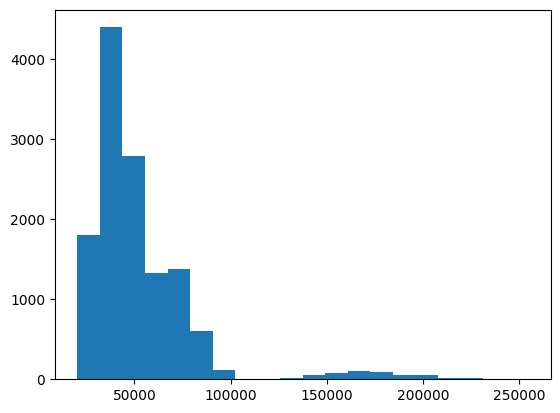

In [207]:
plt.hist(df["Area"], bins=20)
plt.show()

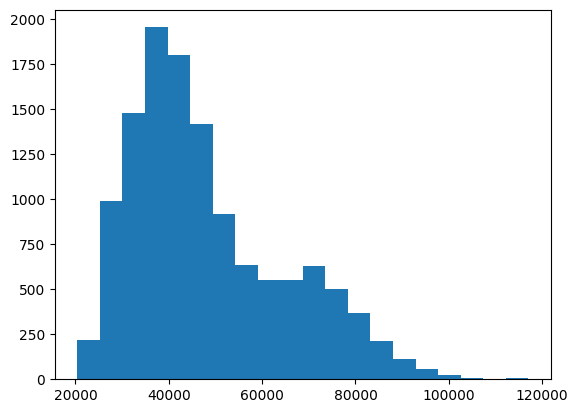

In [208]:
# It seems to have two added distributions are in this col. An arbitrary value of 125000 is selected to divide them
dividing_line = 125000

plt.hist(df.loc[df["Area"]<dividing_line, "Area"], bins=20)

plt.show()

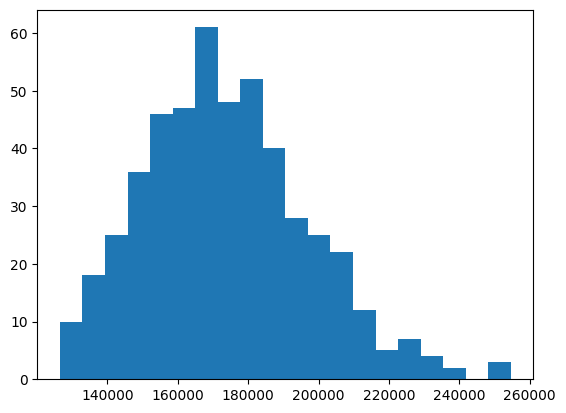

In [209]:
plt.hist(df.loc[df["Area"]>=dividing_line, "Area"], bins=20)
plt.show()

In [210]:
# we check if these different distributions are random or depend on the type of bean



In [211]:
df.loc[df["Area"]>=dividing_line, "Class"].value_counts()

Class
BOMBAY    491
Name: count, dtype: int64

In [212]:
df.loc[df["Area"]<dividing_line, "Class"].value_counts()

Class
DERMASON    3381
SIRA        2497
SEKER       1926
HOROZ       1821
CALI        1548
BARBUNYA    1264
BOMBAY         2
Name: count, dtype: int64

In [213]:
# We have a perfect separation. We will use this property to determine the min and max values for each distribution
# we will also update the dividing line which was arbitrary. We will include these two bombay beans as well.


df.loc[(df["Area"]<dividing_line) & (df["Class"] == "BOMBAY"), "Area"].min()

np.float64(114004.0)

In [214]:
# the value below is the min value for bombay.
# We now need to check if there are any different sort between this min value and our arbitrary dividing line

df.loc[(df["Area"]>=114004) & (df["Area"]<dividing_line), ["Area", "Class"]]

,Area,Class
3348,115967.0,BARBUNYA
3349,114004.0,BOMBAY
3350,117034.0,BOMBAY
5498,114858.0,CALI
5499,115608.0,CALI
5500,116272.0,CALI


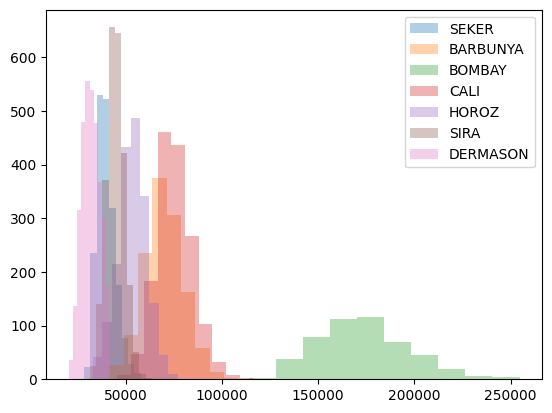

In [215]:
# Since there are overlaps, we will continue with each sort of bean individually.
# We'll check whether they have different distributions for the feature area

for bean in df["Class"].unique():
    plt.hist(df.loc[df["Class"]==bean, "Area"], alpha=.35, label=bean)
    
plt.legend()    
plt.show()

# Starting over Again

# 1. Preprocessing

In [216]:
# We'll adjust our approach and apply noise correction in each feature depending on the type of bean
# This means we'll undone the previous actions

df = pd.read_excel("Dry_Bean_Dataset.xlsx")

for col in ['Area', 'Perimeter']:
    df.loc[df.sample(frac=0.05, random_state=42).index, col] = np.nan

df.loc[df.sample(frac=0.35, random_state=1).index, 'Eccentricity'] = np.nan

In [217]:
df.isnull().sum()

Area                681
Perimeter           681
MajorAxisLength       0
MinorAxisLength       0
AspectRation          0
Eccentricity       4764
ConvexArea            0
EquivDiameter         0
Extent                0
Solidity              0
roundness             0
Compactness           0
ShapeFactor1          0
ShapeFactor2          0
ShapeFactor3          0
ShapeFactor4          0
Class                 0
dtype: int64

In [218]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395.0,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734.0,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380.0,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008.0,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140.0,620.134,201.847882,190.279279,1.060798,NaN,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [219]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,12930.000000,12930.000000,13611.000000,13611.000000,13611.000000,8847.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53020.594973,855.094134,320.141867,202.270714,1.583242,0.751516,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29283.485203,214.095166,85.694186,44.970091,0.246678,0.091268,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36321.250000,703.388500,253.303633,175.848170,1.432307,0.716318,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44645.000000,794.841500,296.883367,192.431733,1.551124,0.764973,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61342.750000,977.175250,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


## 1.1. Missing Values

In [220]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [221]:
scaler = StandardScaler()

In [222]:
# in order to calculate the missing values in area and perimeter,
# I'll build two models with features that have no nan values
# In order to do so, we need to check for best correlated features with each

df_corr = df.loc[:,df.columns[:-2]]
df_corr.corr()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3
Area,1.000000,0.966646,0.931882,0.951565,0.241807,0.266009,0.999939,0.984947,0.054698,-0.194838,-0.357505,-0.268059,-0.847874,-0.639333,-0.272105
Perimeter,0.966646,1.000000,0.977268,0.913233,0.384963,0.388511,0.967630,0.991345,-0.021414,-0.302946,-0.547755,-0.406486,-0.864692,-0.767389,-0.408042
MajorAxisLength,0.931882,0.977268,1.000000,0.826052,0.550335,0.539361,0.932607,0.961733,-0.078062,-0.284302,-0.596358,-0.568377,-0.773609,-0.859238,-0.568185
MinorAxisLength,0.951565,0.913233,0.826052,1.000000,-0.009161,0.017730,0.951339,0.948539,0.145957,-0.155831,-0.210344,-0.015066,-0.947204,-0.471347,-0.019326
AspectRation,0.241807,0.384963,0.550335,-0.009161,1.000000,0.925316,0.243301,0.303647,-0.370184,-0.267754,-0.766979,-0.987687,0.024593,-0.837841,-0.978592
Eccentricity,0.266009,0.388511,0.539361,0.017730,0.925316,1.000000,0.267002,0.315700,-0.317989,-0.294679,-0.720952,-0.970845,0.021434,-0.857941,-0.981454
ConvexArea,0.999939,0.967630,0.932607,0.951339,0.243301,0.267002,1.000000,0.985226,0.052564,-0.206191,-0.362083,-0.269922,-0.847950,-0.640862,-0.274024
EquivDiameter,0.984947,0.991345,0.961733,0.948539,0.303647,0.315700,0.985226,1.000000,0.028383,-0.231648,-0.435945,-0.327650,-0.892741,-0.713069,-0.330389
Extent,0.054698,-0.021414,-0.078062,0.145957,-0.370184,-0.317989,0.052564,0.028383,1.000000,0.191389,0.344411,0.354212,-0.141616,0.237956,0.347624
Solidity,-0.194838,-0.302946,-0.284302,-0.155831,-0.267754,-0.294679,-0.206191,-0.231648,0.191389,1.000000,0.607150,0.303766,0.153388,0.343559,0.307662


### 1.1.1. Missing Values

In [223]:
# column Area seems perfectly correlating with column ConvexArea
# whereas column Perimeter is perfectly correlating with EquivDiameter
# What we need is to find the y=ax+b function so that we can calculate the missing values for each features

# for eccentricity, on the other hand,
# I'll apply a multilinear regression since there is no perfect correlation with any of the single features.

df.loc[:,["Area", "ConvexArea"]]

,Area,ConvexArea
0,28395.0,28715
1,28734.0,29172
2,29380.0,29690
3,30008.0,30724
4,30140.0,30417
...,...,...
13606,42097.0,42508
13607,42101.0,42494
13608,42139.0,42569
13609,42147.0,42667


In [224]:
# The code below is written by me for another project.
# Thus, this is not a copy paste class and it is appropriate to use it here

import random

class ML:
    import numpy as np
    import random
    
    # init function
    
    def __init__(self, data, target, simple_model=True):
        self.data = data
        self.target = target
        self.simple_model = simple_model
        self.weights = None
        self.learning_rate = 0.02
        
    # parameter changing
    
    def set_learning_rate(self, lr):
        self.learning_rate = lr
    
    def LinearRegression(self, stochastic=False):
        if self.simple_model:
            a = ((self.data - self.data.mean()) * (self.target - self.target.mean())).sum() / ((self.data - self.data.mean()) ** 2).sum()
            b = self.target.mean() - (a * self.data.mean())
            
            return (a, b)
        else:
            
            self.initiate_weights()
        
            epoch = 10000
            for i in range(epoch):
                error = self.calculate_error()
                self.gradient_descent(error)
            
            return self.weights
    
    ## helper methods
    # Linear Regression
    
    def initiate_weights(self):
        num_features = self.data.shape[1]
        self.weights = np.array([random.random() for x in range(num_features)])
    
    def forward_pass(self):
        return (self.data@self.weights)
    
    def calculate_error(self):
        return self.forward_pass() - self.target
    
    def gradient_descent(self, error):
        self.weights = self.weights - self.learning_rate * (2 * (error.mean() * self.weights))


In [225]:
# a and b values are below. Whenever we need to calculate a nan value,
# we simply need to apply f(x)=ax + b

ml = ML(df["Area"], df["ConvexArea"])
a, b = ml.LinearRegression()
print(a, b)

1.01528226796459 -62.66970723353734


In [226]:
df.loc[df["Area"].isnull(), "Area"]  = np.array(df.loc[df["Area"].isnull(), ["ConvexArea"]] * a + b)

In [227]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,12930.000000,13611.000000,13611.000000,13611.000000,8847.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53122.466222,855.094134,320.141867,202.270714,1.583242,0.751516,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29376.457222,214.095166,85.694186,44.970091,0.246678,0.091268,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36371.000000,703.388500,253.303633,175.848170,1.432307,0.716318,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44710.000000,794.841500,296.883367,192.431733,1.551124,0.764973,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61459.500000,977.175250,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


### 1.1.2. Perimeter

In [228]:
df.loc[:,["Perimeter", "EquivDiameter"]]

,Perimeter,EquivDiameter
0,610.291,190.141097
1,638.018,191.272750
2,624.110,193.410904
3,645.884,195.467062
4,620.134,195.896503
...,...,...
13606,759.696,231.515799
13607,757.499,231.526798
13608,759.321,231.631261
13609,763.779,231.653248


In [229]:
ml = ML(df["Perimeter"], df["EquivDiameter"])
a, b = ml.LinearRegression()
print(a, b)

0.27373600806670595 18.994165112110977


In [230]:
df.loc[df["Perimeter"].isnull(), "Perimeter"] = np.array(df.loc[df["Perimeter"].isnull(), ["EquivDiameter"]] * a + b)

In [231]:
df.isnull().sum()

Area                  0
Perimeter             0
MajorAxisLength       0
MinorAxisLength       0
AspectRation          0
Eccentricity       4764
ConvexArea            0
EquivDiameter         0
Extent                0
Solidity              0
roundness             0
Compactness           0
ShapeFactor1          0
ShapeFactor2          0
ShapeFactor3          0
ShapeFactor4          0
Class                 0
dtype: int64

### 1.1.3. Eccentricity

In [232]:
# We select the four highest correlated features
# ShapeFactor3, Compactness, AspectRation, and ShapeFactor2

df_corr.corr()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3
Area,1.000000,0.966646,0.931882,0.951565,0.241807,0.266009,0.999939,0.984947,0.054698,-0.194838,-0.357505,-0.268059,-0.847874,-0.639333,-0.272105
Perimeter,0.966646,1.000000,0.977268,0.913233,0.384963,0.388511,0.967630,0.991345,-0.021414,-0.302946,-0.547755,-0.406486,-0.864692,-0.767389,-0.408042
MajorAxisLength,0.931882,0.977268,1.000000,0.826052,0.550335,0.539361,0.932607,0.961733,-0.078062,-0.284302,-0.596358,-0.568377,-0.773609,-0.859238,-0.568185
MinorAxisLength,0.951565,0.913233,0.826052,1.000000,-0.009161,0.017730,0.951339,0.948539,0.145957,-0.155831,-0.210344,-0.015066,-0.947204,-0.471347,-0.019326
AspectRation,0.241807,0.384963,0.550335,-0.009161,1.000000,0.925316,0.243301,0.303647,-0.370184,-0.267754,-0.766979,-0.987687,0.024593,-0.837841,-0.978592
Eccentricity,0.266009,0.388511,0.539361,0.017730,0.925316,1.000000,0.267002,0.315700,-0.317989,-0.294679,-0.720952,-0.970845,0.021434,-0.857941,-0.981454
ConvexArea,0.999939,0.967630,0.932607,0.951339,0.243301,0.267002,1.000000,0.985226,0.052564,-0.206191,-0.362083,-0.269922,-0.847950,-0.640862,-0.274024
EquivDiameter,0.984947,0.991345,0.961733,0.948539,0.303647,0.315700,0.985226,1.000000,0.028383,-0.231648,-0.435945,-0.327650,-0.892741,-0.713069,-0.330389
Extent,0.054698,-0.021414,-0.078062,0.145957,-0.370184,-0.317989,0.052564,0.028383,1.000000,0.191389,0.344411,0.354212,-0.141616,0.237956,0.347624
Solidity,-0.194838,-0.302946,-0.284302,-0.155831,-0.267754,-0.294679,-0.206191,-0.231648,0.191389,1.000000,0.607150,0.303766,0.153388,0.343559,0.307662


In [233]:
data = df.loc[~df["Eccentricity"].isnull(), ["ShapeFactor2", "ShapeFactor3", "AspectRation", "Compactness"]]
target = df.loc[~df["Eccentricity"].isnull(), "Eccentricity"]

In [234]:
from sklearn.linear_model import LinearRegression

In [235]:
model = LinearRegression()

In [236]:
model.fit(data, target)

LinearRegression()

In [237]:
model.score(data, target)

0.9985923641404488

In [238]:
(model.coef_, model.intercept_)

(array([ 0.3643494 , -7.55600922,  0.44880671, 12.42836078]),
 np.float64(-5.038314069424181))

In [239]:
data.iloc[0]

ShapeFactor2    0.003147
ShapeFactor3    0.834222
AspectRation    1.197191
Compactness     0.913358
Name: 0, dtype: float64

In [240]:
df.loc[df["Eccentricity"].isnull()].shape[0]

4764

In [241]:
missing_data = df.loc[df["Eccentricity"].isnull(), ["ShapeFactor2", "ShapeFactor3", "AspectRation", "Compactness"]]

result = []

for i in range(df.loc[df["Eccentricity"].isnull()].shape[0]):
    result.append(missing_data.iloc[i] @ model.coef_ + model.intercept_)
result

[np.float64(0.384023626502521),
 np.float64(0.4951568553263588),
 np.float64(0.5163383547778784),
 np.float64(0.5113865879167783),
 np.float64(0.5196546722806845),
 np.float64(0.5132679053731417),
 np.float64(0.5234331895362381),
 np.float64(0.6887729141200749),
 np.float64(0.5562082358036218),
 np.float64(0.5927697330632231),
 np.float64(0.4645174756959154),
 np.float64(0.45325586680394103),
 np.float64(0.442964560345418),
 np.float64(0.452229231146581),
 np.float64(0.6388770534031174),
 np.float64(0.5819538092564907),
 np.float64(0.4919088681185526),
 np.float64(0.5794265640171172),
 np.float64(0.5614297910650343),
 np.float64(0.5081851698804938),
 np.float64(0.5138107761771309),
 np.float64(0.519670398258496),
 np.float64(0.5712736594707186),
 np.float64(0.5632928914164967),
 np.float64(0.6547483166324408),
 np.float64(0.45514582154664485),
 np.float64(0.5399411053795644),
 np.float64(0.563463691684853),
 np.float64(0.6121286909146075),
 np.float64(0.5786787490545464),
 np.float64(0

In [242]:
df.loc[df["Eccentricity"].isnull(), "Eccentricity"] = result

In [243]:
df_corr = df.loc[:,df.columns[:-2]]
df_corr.corr()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3
Area,1.000000,0.726750,0.931800,0.951467,0.241855,0.267773,0.999857,0.984880,0.054484,-0.196879,-0.357654,-0.268186,-0.847820,-0.639313,-0.272261
Perimeter,0.726750,1.000000,0.741731,0.696037,0.288195,0.294404,0.735627,0.753919,-0.030010,-0.240215,-0.418012,-0.305386,-0.659779,-0.582016,-0.306821
MajorAxisLength,0.931800,0.741731,1.000000,0.826052,0.550335,0.542298,0.932607,0.961733,-0.078062,-0.284302,-0.596358,-0.568377,-0.773609,-0.859238,-0.568185
MinorAxisLength,0.951467,0.696037,0.826052,1.000000,-0.009161,0.019573,0.951339,0.948539,0.145957,-0.155831,-0.210344,-0.015066,-0.947204,-0.471347,-0.019326
AspectRation,0.241855,0.288195,0.550335,-0.009161,1.000000,0.924939,0.243301,0.303647,-0.370184,-0.267754,-0.766979,-0.987687,0.024593,-0.837841,-0.978592
Eccentricity,0.267773,0.294404,0.542298,0.019573,0.924939,1.000000,0.269413,0.318900,-0.319370,-0.294790,-0.722981,-0.970834,0.019912,-0.860557,-0.981536
ConvexArea,0.999857,0.735627,0.932607,0.951339,0.243301,0.269413,1.000000,0.985226,0.052564,-0.206191,-0.362083,-0.269922,-0.847950,-0.640862,-0.274024
EquivDiameter,0.984880,0.753919,0.961733,0.948539,0.303647,0.318900,0.985226,1.000000,0.028383,-0.231648,-0.435945,-0.327650,-0.892741,-0.713069,-0.330389
Extent,0.054484,-0.030010,-0.078062,0.145957,-0.370184,-0.319370,0.052564,0.028383,1.000000,0.191389,0.344411,0.354212,-0.141616,0.237956,0.347624
Solidity,-0.196879,-0.240215,-0.284302,-0.155831,-0.267754,-0.294790,-0.206191,-0.231648,0.191389,1.000000,0.607150,0.303766,0.153388,0.343559,0.307662


## 1.2. Outlier Detection

In [244]:
# we will update the z score noise function as well. This will now include the sort of bean as well
# For easier use, data type will be changed from array to dictionary
    
def z_score_noise(data, beans, spread_val):
    
    dict_min_max = {} 
    
    for bean in beans:
        dict_min_max[bean] = {}
    
    for col in data.columns:
        if data[col].dtype != "object":
            for bean in beans:
                mean_val = data.loc[df["Class"]==bean, col].mean()
                std_val = data.loc[df["Class"]==bean, col].std()

                dict_min_max[bean][col] = [mean_val - spread_val*std_val, mean_val + spread_val*std_val]

    return dict_min_max
    

In [245]:
dict_min_max = z_score_noise(df, df["Class"].unique(), 1.96)

In [246]:
# by calculating z score with the help of classes, we can now assume our distributions are normal

col_list_z_adjusted = []

for bean in dict_min_max.keys():
    for feature in dict_min_max[bean].keys():
        if dict_min_max[bean][feature][0] < df.loc[(df["Class"]==bean), feature].min() or dict_min_max[bean][feature][0] > df.loc[(df["Class"]==bean), feature].max():
                col_list_z_adjusted.append(bean + "-" + feature)
                
col_list_z_adjusted

[]

In [247]:
for bean in df["Class"].unique():
    for col in df.columns:
        if df[col].dtype != "object":
            df.loc[(df["Class"]==bean) & (df[col]<dict_min_max[bean][col][0]), col] = dict_min_max[bean][col][0]
            df.loc[(df["Class"]==bean) & (df[col]>dict_min_max[bean][col][1]), col] = dict_min_max[bean][col][1]

/tmp/ipykernel_69336/2093400900.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '30814.788762880038' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df["Class"]==bean) & (df[col]<dict_min_max[bean][col][0]), col] = dict_min_max[bean][col][0]


In [248]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53061.773773,835.825044,320.099219,202.188557,1.582699,0.751730,53706.980869,253.047321,0.749981,0.987345,0.874380,0.799758,0.006560,0.001712,0.643280,0.995224
std,29194.642993,226.150833,85.342852,44.687208,0.245208,0.090390,29592.152350,58.913543,0.048687,0.003932,0.057380,0.061309,0.001119,0.000591,0.098260,0.003785
min,22980.886247,375.262918,206.055384,141.059284,1.084024,0.448942,23265.358076,172.710659,0.558841,0.973576,0.705116,0.654586,0.003033,0.000580,0.425915,0.979351
25%,36442.500000,691.121000,253.482906,175.872143,1.428997,0.715491,36777.500000,215.285460,0.718874,0.985670,0.835673,0.762943,0.005904,0.001153,0.582082,0.993718
50%,44716.000000,784.541000,296.738268,192.332584,1.552359,0.765326,45214.000000,238.472733,0.759859,0.988283,0.883091,0.800981,0.006644,0.001694,0.641571,0.996386
75%,61454.000000,966.244500,376.480180,216.685916,1.704569,0.811562,62282.500000,279.441910,0.786851,0.990013,0.916743,0.834971,0.007271,0.002165,0.697176,0.997883
max,219629.863408,1985.370000,697.417598,420.019199,2.291424,0.908679,222506.686558,530.419898,0.853945,0.994677,0.990685,0.953146,0.008926,0.003179,0.905354,0.999733


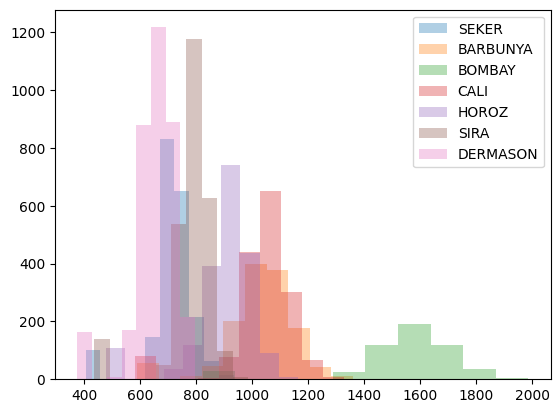

In [249]:
# Since there are overlaps, we will continue with each sort of bean individually.
# We'll check whether they have different distributions for the feature area

for bean in df["Class"].unique():
    plt.hist(df.loc[df["Class"]==bean, "Perimeter"], alpha=.35, label=bean)
    
plt.legend()    
plt.show()

## 1.3. Feature Scaling (StandardScaler)

In [250]:
from sklearn.preprocessing import StandardScaler

In [251]:
scaler = StandardScaler()

In [252]:
data = df.iloc[:,:-2]

In [253]:
X_raw = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [254]:
X_raw.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3
count,1.361100e+04,1.361100e+04,1.361100e+04,1.361100e+04,1.361100e+04,1.361100e+04,1.361100e+04,1.361100e+04,1.361100e+04,1.361100e+04,1.361100e+04,1.361100e+04,1.361100e+04,1.361100e+04,1.361100e+04
mean,3.341028e-17,3.341028e-16,5.345645e-16,1.336411e-16,6.347954e-16,1.085834e-16,1.002308e-16,-3.675131e-16,2.192550e-16,2.245171e-14,3.341028e-16,-8.352571e-16,5.345645e-16,-3.341028e-17,-4.009234e-16
std,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00
min,-1.030394e+00,-2.036601e+00,-1.336351e+00,-1.367987e+00,-2.033751e+00,-3.349919e+00,-1.028744e+00,-1.363687e+00,-3.926016e+00,-3.502102e+00,-2.949974e+00,-2.367945e+00,-3.152838e+00,-1.915665e+00,-2.212234e+00
25%,-5.692786e-01,-6.398798e-01,-7.806015e-01,-5.889243e-01,-6.268470e-01,-4.009343e-01,-5.721146e-01,-6.409944e-01,-6.389297e-01,-4.258436e-01,-6.745859e-01,-6.005021e-01,-5.858304e-01,-9.460813e-01,-6.228421e-01
50%,-2.858771e-01,-2.267775e-01,-2.737407e-01,-2.205628e-01,-1.237359e-01,1.504218e-01,-2.870117e-01,-2.473985e-01,2.028999e-01,2.387003e-01,1.518164e-01,1.995241e-02,7.567298e-02,-3.122357e-02,-1.739275e-02
75%,2.874683e-01,5.767135e-01,6.606650e-01,3.244305e-01,4.970222e-01,6.619502e-01,2.898010e-01,4.480389e-01,7.573271e-01,6.787734e-01,7.383190e-01,5.743635e-01,6.359268e-01,7.653439e-01,5.485267e-01
max,5.705643e+00,5.083276e+00,4.421369e+00,4.874743e+00,2.890401e+00,1.736412e+00,5.704415e+00,4.708302e+00,2.135421e+00,1.865213e+00,2.027003e+00,2.501966e+00,2.115591e+00,2.482288e+00,2.667259e+00


## 1.3. Categorical Encoding

In [255]:
# Since there is only one categorical class in the dataset, we will convert only that
# This is the class feature
# We just need to apply the index number in df["Class"].unique() so that we kan keep track of the outputs

df["Class"]

y = df["Class"].apply(lambda x: np.where(df["Class"].unique() == x)[0][0])
y

0        0
1        0
2        0
3        0
4        0
        ..
13606    6
13607    6
13608    6
13609    6
13610    6
Name: Class, Length: 13611, dtype: int64

# 2. Feature Selection and Dimensionality Reduction

## 2.1. PCA

In [256]:
from sklearn.decomposition import PCA

In [257]:
df_scaled = X_raw

In [258]:
y

0        0
1        0
2        0
3        0
4        0
        ..
13606    6
13607    6
13608    6
13609    6
13610    6
Name: Class, Length: 13611, dtype: int64

In [259]:
pca = PCA(n_components=3)

In [260]:
pca.fit(X_raw)

PCA(n_components=3)

In [261]:
pca.explained_variance_ratio_

array([0.56874993, 0.27814303, 0.06505773])

In [262]:
# because the third variable explains merely 6% as opposed to the 27% of the second, we can omit that as well
# we'll proceed with 2 components only
# These 2 components amount to more than 80% of the variance in the dataset

In [263]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

In [264]:
pca.explained_variance_ratio_

array([0.56874993, 0.27814303])

In [265]:
pd.DataFrame(df_pca)

,0,1
0,-4.713208,2.121325
1,-4.927738,2.856518
2,-4.551325,2.035783
3,-4.586222,2.364609
4,-5.523279,3.470759
...,...,...
13606,-1.012914,-0.502954
13607,-1.511534,0.465493
13608,-1.386338,0.126671
13609,-1.127756,-0.199632


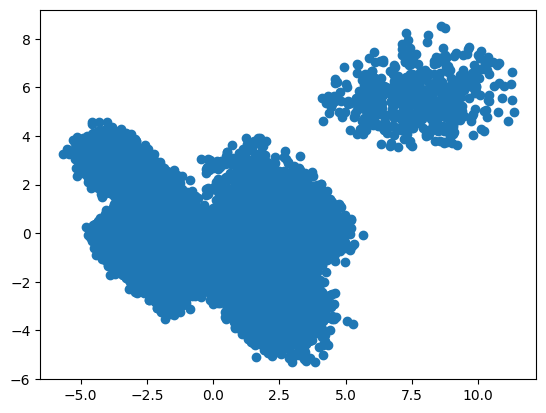

In [266]:
plt.scatter(df_pca[:,0], df_pca[:,1])
plt.show()

In [267]:
pd.DataFrame(df_pca).iloc[50:75]

,0,1
50,-4.474793,2.388505
51,-4.404676,2.228779
52,-4.881463,2.912025
53,-4.989538,3.038126
54,-4.494178,2.414976
55,-4.426340,2.390354
56,-4.030161,2.005723
57,-4.995792,2.929672
58,-4.643139,2.609698
59,-4.214925,1.958242


## 2.2. LDA

In [268]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [269]:
lda = LinearDiscriminantAnalysis(n_components=3)

In [270]:
df_lda = lda.fit_transform(df_scaled, y)

In [271]:
prediction_val = []

for i in range(df_scaled.shape[0]):
    prediction_val.append(lda.predict([df_scaled.loc[i]])[0])

/home/sarp-solakoglu/sklearn-env/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/home/sarp-solakoglu/sklearn-env/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/home/sarp-solakoglu/sklearn-env/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/home/sarp-solakoglu/sklearn-env/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/home/sarp-solakoglu/sklearn-env/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarn

/home/sarp-solakoglu/sklearn-env/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/home/sarp-solakoglu/sklearn-env/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/home/sarp-solakoglu/sklearn-env/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/home/sarp-solakoglu/sklearn-env/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/home/sarp-solakoglu/sklearn-env/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarn

/home/sarp-solakoglu/sklearn-env/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/home/sarp-solakoglu/sklearn-env/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/home/sarp-solakoglu/sklearn-env/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/home/sarp-solakoglu/sklearn-env/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/home/sarp-solakoglu/sklearn-env/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarn

/home/sarp-solakoglu/sklearn-env/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/home/sarp-solakoglu/sklearn-env/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/home/sarp-solakoglu/sklearn-env/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/home/sarp-solakoglu/sklearn-env/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/home/sarp-solakoglu/sklearn-env/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarn

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [272]:
(prediction_val == y).sum() / len(y)

np.float64(0.9088972154874734)

In [273]:
lda.coef_, lda.intercept_

(array([[-1.00875061e+01,  6.85491108e-02, -1.03814262e+01,
         -3.47766987e+01, -4.49958231e+01,  2.51755732e+01,
          5.09753659e+01, -2.88241161e+01, -2.20770234e-01,
          1.05352272e+00,  1.61088029e+00, -3.63058453e+02,
         -1.86326514e+01, -1.68221197e+01,  3.62838902e+02],
        [-5.71445932e+01, -1.70600218e+00,  6.21682328e+00,
          1.85598922e+01,  6.05872383e+01, -2.33215083e+01,
          4.57504278e+00,  5.83293617e+01,  5.72199417e-01,
          1.25195750e-01, -1.05602870e+01,  4.17632356e+02,
          1.43074159e+01,  1.04681353e+01, -3.76830824e+02],
        [ 1.34544674e+02,  2.81192121e+00, -1.62232085e+01,
          1.22652973e+02,  6.98433620e+01, -2.89131384e+01,
         -9.84539930e+01,  1.10228740e+01,  3.07983984e-01,
         -1.30802531e+00,  3.70664910e+00,  4.07473674e+02,
          7.62207675e+01,  1.64698292e+01, -3.86230245e+02],
        [ 1.55118566e+01,  1.92614582e-01,  3.25429727e+01,
          3.26896493e+01, -7.59622175

In [274]:
pd.DataFrame(df_lda).head()

,0,1,2
0,-3.121696,-3.137526,0.077640
1,-3.482486,-3.476298,2.248794
2,-3.263420,-3.144493,-0.027810
3,-2.856547,-2.741770,1.707010
4,-3.845918,-3.933071,-0.628765


## 2.3. Data We Have (raw, pca, lda)

In [275]:
X_raw.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3
0,-0.771293,-0.997309,-1.264915,-0.486215,-1.572221,-2.233934,-0.773618,-0.919269,0.286366,0.384449,1.457826,1.852962,0.385001,2.427992,1.943318
1,-0.771293,-0.874701,-1.264915,-0.435356,-1.979379,-3.349919,-0.773618,-0.919269,0.698103,-0.600029,0.220533,2.501966,0.374679,2.482288,2.667259
2,-0.771293,-0.936202,-1.257012,-0.486215,-1.521155,-2.091046,-0.773618,-0.919269,0.577843,0.563208,1.280447,1.778198,0.385001,2.259538,1.858318
3,-0.771293,-0.839917,-1.264915,-0.440233,-1.749845,-2.800347,-0.773618,-0.919269,0.671671,-0.727673,0.515118,2.097160,0.385001,2.482288,2.223933
4,-0.771293,-0.953784,-1.264915,-0.266513,-2.033751,-3.349919,-0.773618,-0.919269,0.474831,0.902647,1.925774,2.501966,0.122891,2.482288,2.667259


In [276]:
pd.DataFrame(df_pca)

,0,1
0,-4.713208,2.121325
1,-4.927738,2.856518
2,-4.551325,2.035783
3,-4.586222,2.364609
4,-5.523279,3.470759
...,...,...
13606,-1.012914,-0.502954
13607,-1.511534,0.465493
13608,-1.386338,0.126671
13609,-1.127756,-0.199632


In [277]:
pd.DataFrame(df_lda)

,0,1,2
0,-3.121696,-3.137526,0.077640
1,-3.482486,-3.476298,2.248794
2,-3.263420,-3.144493,-0.027810
3,-2.856547,-2.741770,1.707010
4,-3.845918,-3.933071,-0.628765
...,...,...,...
13606,-1.936655,-0.924427,-0.112114
13607,-2.002280,-1.288073,0.556196
13608,-2.081308,-1.280964,0.472057
13609,-1.838196,-0.954395,0.488894


# 3. Modeling and Evaluation

In [278]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [279]:
def train_test_split_func(X_raw, y, test_size, random_state):
    X_train, X_test, y_train, y_test = train_test_split(X_raw, y, test_size=0.33, random_state=42)
    
    return X_train, X_test, y_train, y_test

In [280]:
models = [LogisticRegression, GaussianNB, DecisionTreeClassifier,
          RandomForestClassifier, GradientBoostingClassifier]

# data_on_hand = [data_1, data_2, data_3]

accuracy_dict = {}
precision_score_dict = {}
recall_score_dict = {}
f1_score_dict = {}


i=0
for single_model in models:
    accuracy_dict[i] = []
    precision_score_dict[i] = []
    recall_score_dict[i] = []
    f1_score_dict[i] = []
    
    dfs = [train_test_split_func(X_raw, y, .33, i),
          train_test_split_func(df_pca, y, .33, i),
          train_test_split_func(df_lda, y, .33, i),]
    j=0
    for processed_data in dfs:
        model = single_model()
        model.fit(processed_data[0], processed_data[2])
        
        accuracy_dict[i].append(accuracy_score(processed_data[3], model.predict(processed_data[1])))
        precision_score_dict[i].append(precision_score(processed_data[3], model.predict(processed_data[1]), average=None))
        recall_score_dict[i].append(recall_score(processed_data[3], model.predict(processed_data[1]), average=None))
        f1_score_dict[i].append(f1_score(processed_data[3], model.predict(processed_data[1]), average=None))
        
        j+=1
    i+=1

In [281]:
accuracy_dict

{0: [0.9294300979519146, 0.8593054318788959, 0.890026714158504],
 1: [0.8853517364203027, 0.8486197684772929, 0.8840160284951024],
 2: [0.9605966162065895, 0.8292520035618878, 0.8893588601959038],
 3: [0.9708370436331255, 0.8461709706144257, 0.9198575244879786],
 4: [0.97506678539626, 0.8512911843276937, 0.917853962600178]}

In [282]:
precision_score_dict

{0: [array([0.97090352, 0.96478873, 1.        , 0.90070922, 0.975     ,
         0.85394456, 0.93333333]),
  array([0.95807453, 0.68965517, 1.        , 0.69618056, 0.96656051,
         0.83765502, 0.87687188]),
  array([0.81068702, 0.93607306, 1.        , 0.91917293, 0.9734375 ,
         0.87486157, 0.85253054])],
 1: [array([0.95129376, 0.80128205, 1.        , 0.85657371, 0.95962733,
         0.82896237, 0.87821612]),
  array([0.9591195 , 0.69255663, 1.        , 0.67475728, 0.94907407,
         0.82071269, 0.86390041]),
  array([0.80267062, 0.9138322 , 1.        , 0.89279113, 0.97464342,
         0.83586957, 0.8870822 ])],
 2: [array([0.98796992, 0.92156863, 1.        , 0.9486692 , 0.99843505,
         0.94232987, 0.95250432]),
  array([0.94753086, 0.56403941, 1.        , 0.63250883, 0.95125786,
         0.8245614 , 0.86118038]),
  array([0.87323944, 0.90486726, 1.        , 0.90377358, 0.97472354,
         0.85176739, 0.8512257 ])],
 3: [array([0.99241275, 0.98364486, 1.        , 0.94

In [283]:
precision_score_dict

{0: [array([0.97090352, 0.96478873, 1.        , 0.90070922, 0.975     ,
         0.85394456, 0.93333333]),
  array([0.95807453, 0.68965517, 1.        , 0.69618056, 0.96656051,
         0.83765502, 0.87687188]),
  array([0.81068702, 0.93607306, 1.        , 0.91917293, 0.9734375 ,
         0.87486157, 0.85253054])],
 1: [array([0.95129376, 0.80128205, 1.        , 0.85657371, 0.95962733,
         0.82896237, 0.87821612]),
  array([0.9591195 , 0.69255663, 1.        , 0.67475728, 0.94907407,
         0.82071269, 0.86390041]),
  array([0.80267062, 0.9138322 , 1.        , 0.89279113, 0.97464342,
         0.83586957, 0.8870822 ])],
 2: [array([0.98796992, 0.92156863, 1.        , 0.9486692 , 0.99843505,
         0.94232987, 0.95250432]),
  array([0.94753086, 0.56403941, 1.        , 0.63250883, 0.95125786,
         0.8245614 , 0.86118038]),
  array([0.87323944, 0.90486726, 1.        , 0.90377358, 0.97472354,
         0.85176739, 0.8512257 ])],
 3: [array([0.99241275, 0.98364486, 1.        , 0.94

In [284]:
recall_score_dict

{0: [array([0.95481928, 0.91333333, 0.90449438, 0.96212121, 0.97805643,
         0.9112628 , 0.8969697 ]),
  array([0.92921687, 0.57777778, 1.        , 0.7594697 , 0.95141066,
         0.84527873, 0.91255411]),
  array([0.7996988 , 0.91111111, 1.        , 0.92613636, 0.97648903,
         0.89874858, 0.84588745])],
 1: [array([0.94126506, 0.83333333, 1.        , 0.81439394, 0.96865204,
         0.82707622, 0.88658009]),
  array([0.9186747 , 0.47555556, 1.        , 0.78977273, 0.96394984,
         0.83845279, 0.9012987 ]),
  array([0.81475904, 0.89555556, 1.        , 0.91477273, 0.96394984,
         0.87485779, 0.85021645])],
 2: [array([0.98945783, 0.94      , 1.        , 0.94507576, 1.        ,
         0.9294653 , 0.95497835]),
  array([0.9246988 , 0.50888889, 1.        , 0.6780303 , 0.94827586,
         0.80204778, 0.8969697 ]),
  array([0.84036145, 0.90888889, 1.        , 0.90719697, 0.96708464,
         0.84982935, 0.87186147])],
 3: [array([0.98493976, 0.93555556, 1.        , 0.98

In [285]:
f1_score_dict

{0: [array([0.96279423, 0.93835616, 0.94985251, 0.93040293, 0.97652582,
         0.88167309, 0.91479029]),
  array([0.94342508, 0.62877872, 1.        , 0.72644928, 0.95892575,
         0.8414496 , 0.89435723]),
  array([0.80515542, 0.92342342, 1.        , 0.92264151, 0.97496088,
         0.88664422, 0.849196  ])],
 1: [array([0.94625284, 0.81699346, 1.        , 0.83495146, 0.96411856,
         0.82801822, 0.88237829]),
  array([0.93846154, 0.56389987, 1.        , 0.72774869, 0.95645412,
         0.8294879 , 0.88220339]),
  array([0.80866966, 0.90460157, 1.        , 0.90364827, 0.96926714,
         0.8549194 , 0.86825818])],
 2: [array([0.98871332, 0.93069307, 1.        , 0.94686907, 0.99921691,
         0.93585338, 0.95373973]),
  array([0.93597561, 0.53504673, 1.        , 0.65447898, 0.94976452,
         0.81314879, 0.87871077]),
  array([0.85648503, 0.90687361, 1.        , 0.90548204, 0.97088906,
         0.85079727, 0.86142002])],
 3: [array([0.98866213, 0.95899772, 1.        , 0.96

In [286]:
# GradientBoostingClassifier for the raw data is the best model with better results for each metric.
# Therefore I'll plot its ROC-AUC curve using one-vs-all method, meaning, there will be 7 plots for each class
# Below are the mean and standard deviations for each dataset (raw, pca, lda)

# 3.1. Performance Metrics

## 3.1.1. Accuracy, Precision, Recall, and F1 Score

In [287]:
ls = []

print("The Accuracy Score:\n")
for i in range(3):
    for key in accuracy_dict.keys():
        ls.append(accuracy_dict[key][i])
    print(f"The mean for the model {i+1} is: {np.array(ls).mean()}, the std for the model {i+1} is: {np.array(ls).std()}")

The Accuracy Score:

The mean for the model 1 is: 0.9442564559216386, the std for the model 1 is: 0.033503408046758824
The mean for the model 2 is: 0.8955921638468387, the std for the model 2 is: 0.05457347268281143
The mean for the model 3 is: 0.8971356485604036, the std for the model 3 is: 0.04548636034080191


In [288]:
ls = []

print("The Precision Score:\n")
for i in range(3):
    for key in precision_score_dict.keys():
        ls.append(precision_score_dict[key][i].mean())
    print(f"The mean for the model {i+1} is: {np.array(ls).mean()}, the std for the model {i+1} is: {np.array(ls).std()}")

The Precision Score:

The mean for the model 1 is: 0.9519885932836465, the std for the model 1 is: 0.03061245442595732
The mean for the model 2 is: 0.8994915107933045, the std for the model 2 is: 0.05738113721033177
The mean for the model 3 is: 0.9049256744789568, the std for the model 3 is: 0.04797793946393925


In [289]:
ls = []

print("The recall Score:\n")
for i in range(3):
    for key in recall_score_dict.keys():
        ls.append(recall_score_dict[key][i].mean())
    print(f"The mean for the model {i+1} is: {np.array(ls).mean()}, the std for the model {i+1} is: {np.array(ls).std()}")

The recall Score:

The mean for the model 1 is: 0.9492194761221929, the std for the model 1 is: 0.031373956438974705
The mean for the model 2 is: 0.894774649253705, the std for the model 2 is: 0.05922258970751529
The mean for the model 3 is: 0.9019079536873894, the std for the model 3 is: 0.04997546168910055


In [290]:
ls = []

print("The F1 Score:\n")
for i in range(3):
    for key in f1_score_dict.keys():
        ls.append(f1_score_dict[key][i].mean())
    print(f"The mean for the model {i+1} is: {np.array(ls).mean()}, the std for the model {i+1} is: {np.array(ls).std()}")

The F1 Score:

The mean for the model 1 is: 0.9503730808482093, the std for the model 1 is: 0.03099743179038835
The mean for the model 2 is: 0.8962337280406588, the std for the model 2 is: 0.05887985226194921
The mean for the model 3 is: 0.902773629787846, the std for the model 3 is: 0.04948616507002614


## 3.1.2 ROC-AUC Curve (One-vs-All)

In [291]:
from sklearn.metrics import roc_curve, auc

In [292]:
X_train, X_test, y_train, y_test = train_test_split(X_raw, y, test_size=0.33, random_state=42)

In [293]:
n_classes = len(y.unique())

In [294]:
model = GradientBoostingClassifier()

model.fit(X_train, y_train)

GradientBoostingClassifier()

In [295]:
y_hat = model.predict(X_test)
y_score = model.predict_proba(X_test)

In [296]:
class_order = df["Class"].unique()
class_order

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [297]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)

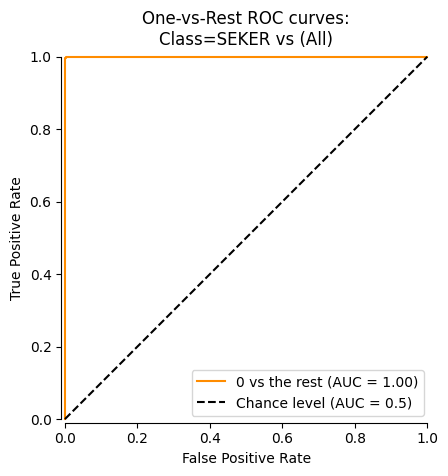

In [298]:
# From then on, ready-codes from the scikit-learn documentation page are used for ROC-AUC display

class_of_interest = 0
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

import matplotlib.pyplot as plt

from sklearn.metrics import RocCurveDisplay

display = RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
    plot_chance_level=True,
    despine=True,
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"One-vs-Rest ROC curves:\nClass={class_order[class_of_interest]} vs (All)",
)

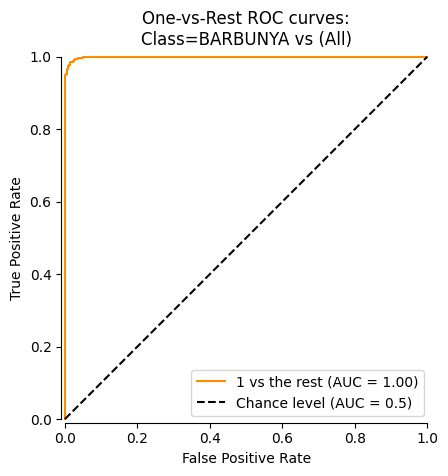

In [299]:
class_of_interest = 1
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

import matplotlib.pyplot as plt

from sklearn.metrics import RocCurveDisplay

display = RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
    plot_chance_level=True,
    despine=True,
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"One-vs-Rest ROC curves:\nClass={class_order[class_of_interest]} vs (All)",
)

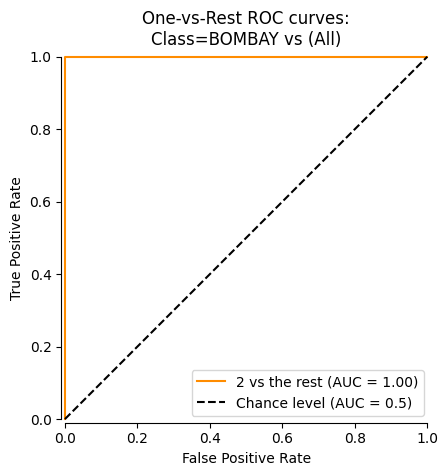

In [300]:
class_of_interest = 2
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

import matplotlib.pyplot as plt

from sklearn.metrics import RocCurveDisplay

display = RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
    plot_chance_level=True,
    despine=True,
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"One-vs-Rest ROC curves:\nClass={class_order[class_of_interest]} vs (All)",
)

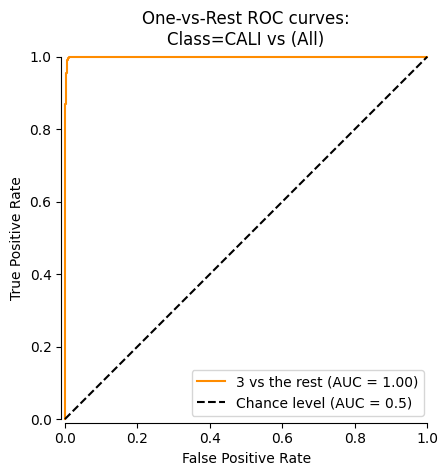

In [301]:
class_of_interest = 3
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

import matplotlib.pyplot as plt

from sklearn.metrics import RocCurveDisplay

display = RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
    plot_chance_level=True,
    despine=True,
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"One-vs-Rest ROC curves:\nClass={class_order[class_of_interest]} vs (All)",
)

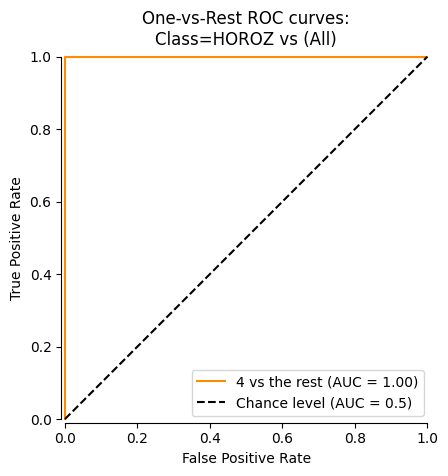

In [302]:
class_of_interest = 4
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

import matplotlib.pyplot as plt

from sklearn.metrics import RocCurveDisplay

display = RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
    plot_chance_level=True,
    despine=True,
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"One-vs-Rest ROC curves:\nClass={class_order[class_of_interest]} vs (All)",
)

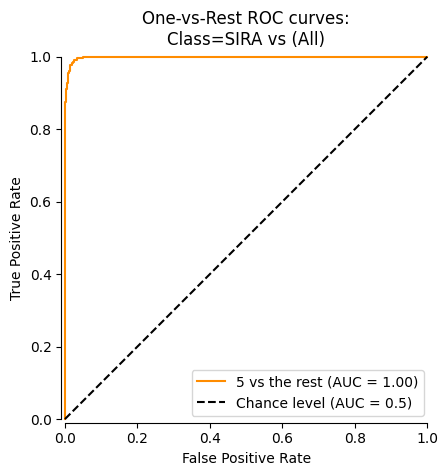

In [303]:
class_of_interest = 5
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

import matplotlib.pyplot as plt

from sklearn.metrics import RocCurveDisplay

display = RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
    plot_chance_level=True,
    despine=True,
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"One-vs-Rest ROC curves:\nClass={class_order[class_of_interest]} vs (All)",
)

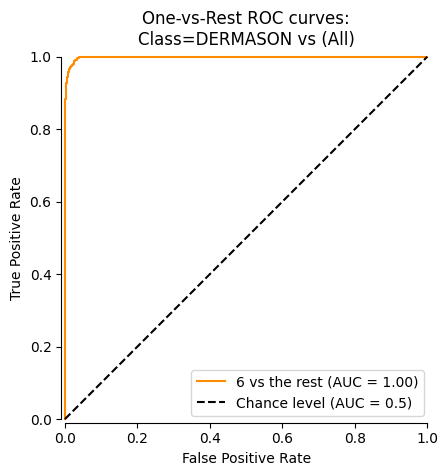

In [304]:
class_of_interest = 6
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

import matplotlib.pyplot as plt

from sklearn.metrics import RocCurveDisplay

display = RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
    plot_chance_level=True,
    despine=True,
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"One-vs-Rest ROC curves:\nClass={class_order[class_of_interest]} vs (All)",
)